In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame
from scipy.stats.stats import pearsonr

In [2]:
data = pd.ExcelFile('Coverage and Estimates - Gompertz.xlsx')
dframe_gomp = data.parse('Sheet1')
data2 = pd.ExcelFile('Coverage and Estimates - Logistic.xlsx')
dframe_log = data2.parse('Sheet1')

In [3]:
subsahara=['Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon',
           'Cabo Verde','Central African Republic','Chad','Comoros','Cote d\'Ivoire',
          'Eritrea','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya',
          'Lesotho','Liberia','Madagascar','Malawi','Mali','Mauritania','Mauritius',
          'Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe',
          'Senegal','Seychelles','Sierra Leone','Somalia','South Africa',
          'South Sudan','Sudan','Swaziland','Tanzania','Togo','Uganda','Zambia',
          'Zimbabwe','Equatorial Guinea','Ethiopia','Congo, Rep.','Congo, Dem. Rep.']

In [4]:
sns.set(font_scale=1.5)

In [7]:
### Gompertz - A
aplot=sns.distplot(dframe_gomp.A,bins=10,kde=False,hist=True)
plt.xlabel('Maximum projected ART coverage (%)')
plt.ylabel('Number of countries')
plt.show()

In [14]:
### Gompertz - A (Trimmed)
aplot2=sns.distplot(dframe_gomp.A[dframe_gomp.A<99],bins=12,kde=False,hist=True)
plt.xlabel('Maximum projected ART coverage (%)')
plt.ylabel('Number of countries')
aplot2.set(ylim=(None,14))
plt.show()

C:\Users\Ben\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


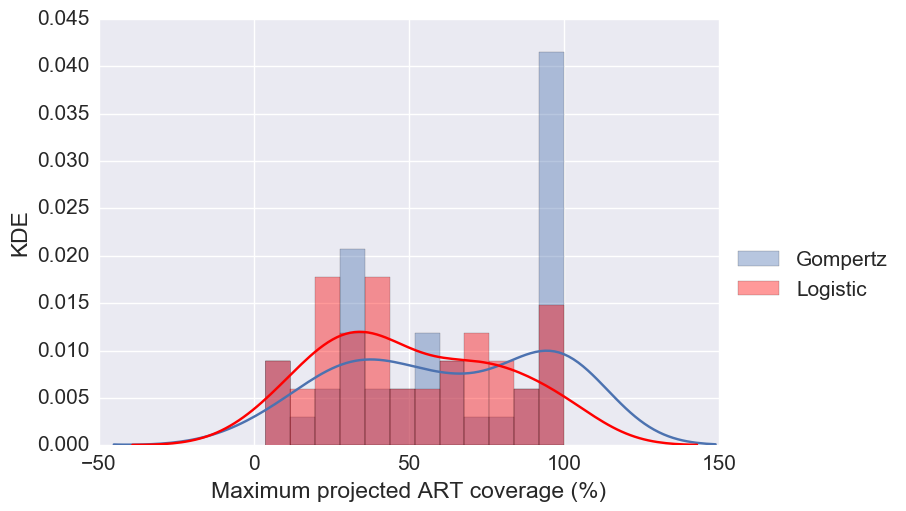

In [5]:
### Gompertz - A, Sub-Saharan Africa
ssa_gomp = dframe_gomp[dframe_gomp['Country Name'].isin(subsahara)]
ssa_log = dframe_log[dframe_log['Country Name'].isin(subsahara)]
aplot3=sns.distplot(ssa_gomp.A,bins=12,hist=True,label='Gompertz')
aplot4=sns.distplot(ssa_log.A,bins=12,hist=True,label='Logistic',color='red')
plt.xlabel('Maximum projected ART coverage (%)')
plt.ylabel('KDE')
lgd = plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
#aplot3.set(ylim=(None,16))
#plt.savefig('a_ssa.png',dpi=300,format='png',bbox_extra_artists=(lgd,),bbox_inches='tight')
plt.show()

In [9]:
ssa_gomp.head()

,Country Name,A,lamb,mu,AIC,BIC,Total Population (2015),Code,Group Name,Country Code,ART Coverage (2014)
2,Angola,64.936576,6.438236,3.994152,10.362041,12.486192,25022000,LMY,Low & middle income,AGO,31.25
7,Benin,43.873948,6.862255,16.703609,35.785241,37.909392,10880000,LMY,Low & middle income,BEN,46.25
9,Botswana,96.793507,2.609430,7.646575,14.642665,16.766816,2262000,LMY,Low & middle income,BWA,77.50
10,Burkina Faso,64.167080,4.033283,6.239762,2.607005,4.731155,18106000,LMY,Low & middle income,BFA,53.75
11,Burundi,99.999999,5.502419,6.305132,3.736511,5.860661,11179000,LMY,Low & middle income,BDI,55.00


In [12]:
a=pd.merge(ssa_gomp[['Country Name','A']],ssa_log[['Country Name','A']],on='Country Name',suffixes=('_gomp','_log'))
lamb=pd.merge(ssa_gomp[['Country Name','lamb']],ssa_log[['Country Name','lamb']],on='Country Name',suffixes=('_gomp','_log'))
mu=pd.merge(ssa_gomp[['Country Name','mu']],ssa_log[['Country Name','mu']],on='Country Name',suffixes=('_gomp','_log'))

In [13]:
a.head()

,Country Name,A_gomp,A_log
0,Angola,64.936576,40.612634
1,Benin,43.873948,43.404478
2,Botswana,96.793507,81.187298
3,Burkina Faso,64.167080,54.516354
4,Burundi,99.999999,70.777089


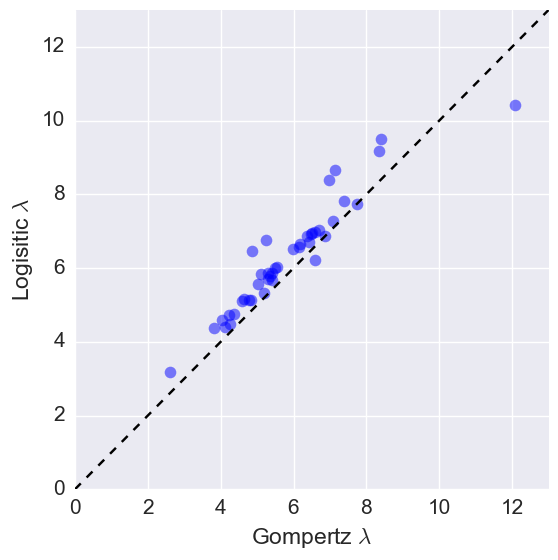

In [54]:
fig=sns.lmplot(x='lamb_gomp',y='lamb_log',data=lamb,scatter=True,fit_reg=False,size=6,
               scatter_kws={'s':70,'color':'b','alpha':0.5})
fig.set(xlim=(0,13),ylim=(0,13))
plt.xlabel(r'Gompertz $\lambda$')
plt.ylabel(r'Logisitic $\lambda$')
plt.plot([0,13],[0,13],'k--')
plt.show()

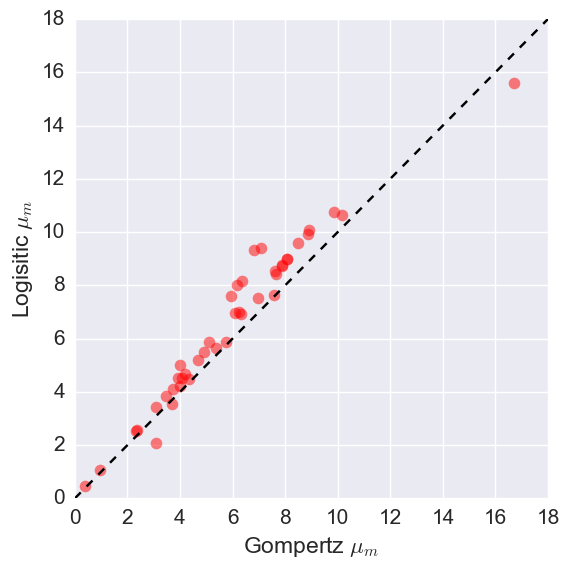

In [55]:
fig=sns.lmplot(x='mu_gomp',y='mu_log',data=mu,scatter=True,fit_reg=False,size=6,
               scatter_kws={'s':70,'color':'r','alpha':0.5})
fig.set(xlim=(0,18),ylim=(0,18))
plt.xlabel(r'Gompertz $\mu_m$')
plt.ylabel(r'Logisitic $\mu_m$')
plt.plot([0,18],[0,18],'k--')
plt.show()

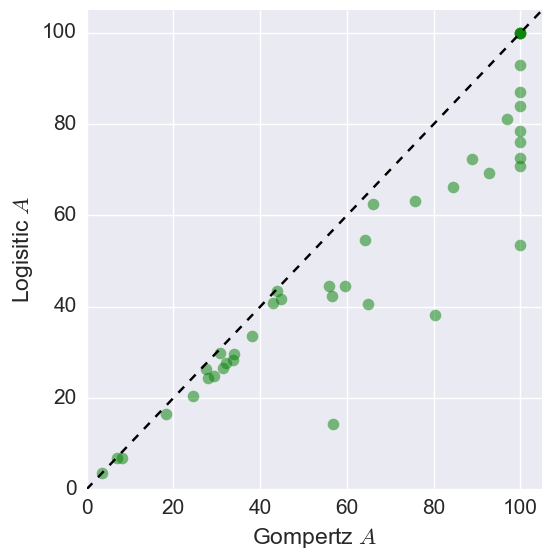

In [57]:
fig=sns.lmplot(x='A_gomp',y='A_log',data=a,scatter=True,fit_reg=False,size=6,
               scatter_kws={'s':70,'color':'g','alpha':0.5})
fig.set(xlim=(0,105),ylim=(0,105))
plt.xlabel(r'Gompertz $A$')
plt.ylabel(r'Logisitic $A$')
plt.plot([0,105],[0,105],'k--')
plt.show()

In [8]:
#Gompertz
print(pearsonr(ssa_gomp.A,ssa_gomp.mu))
print(pearsonr(ssa_gomp.A,ssa_gomp.lamb))
print(pearsonr(ssa_gomp.mu,ssa_gomp.lamb))

(0.52458634592078768, 0.00036209885292530914)
(-0.04055230703899456, 0.79873653541282563)
(-0.19051388975856853, 0.22684851533959657)


In [9]:
#Logistic
print(pearsonr(ssa_log.A,ssa_log.mu))
print(pearsonr(ssa_log.A,ssa_log.lamb))
print(pearsonr(ssa_log.mu,ssa_log.lamb))

(0.72626959258197521, 5.2106954246160582e-08)
(-0.015854112887704039, 0.92062075217720263)
(-0.13269540272448813, 0.40218478577948757)


In [21]:
### Gompertz - A, Sub-Saharan Africa (Trimmed)
aplot4=sns.distplot(ssa_gomp.A[ssa_gomp.A<99],bins=10,kde=False,hist=True)
plt.xlabel('Maximum projected ART coverage (%)')
plt.ylabel('Number of countries')
aplot4.set(ylim=(None,8))
plt.show()

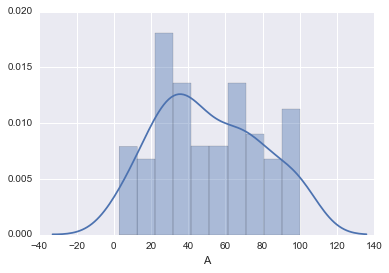

In [52]:
### Logistic - A
aplot5=sns.distplot(dframe_log.A,bins=10)

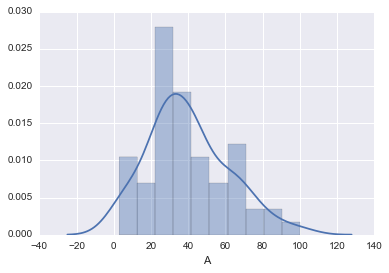

In [55]:
### Logistic - A (Trimmed)
sns.distplot(dframe_log.A[dframe.A<99],bins=10)

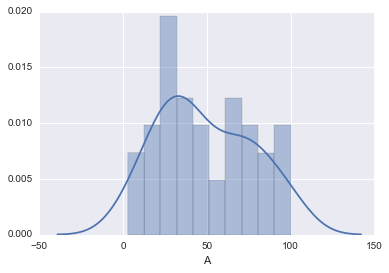

In [81]:
### Logistic - A, Sub-Saharan Africa
sns.distplot(ssa_log.A,bins=10)

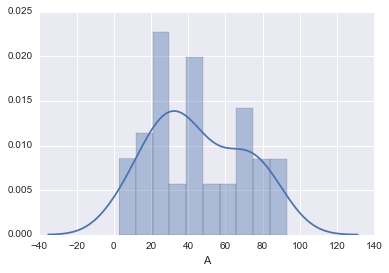

In [82]:
### Logistic - A, Sub-Saharan Africa (Trimmed)
sns.distplot(ssa_log.A[ssa_log.A<99],bins=10)

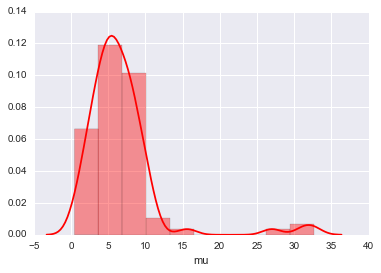

In [56]:
### Logistic - Mu (Trimmed)
sns.distplot(dframe_log.mu[dframe_log.mu>0],bins=10,color='r')

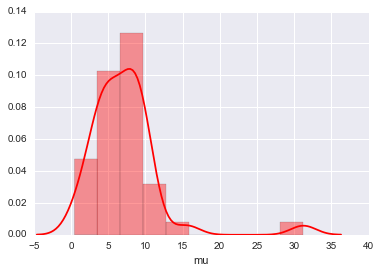

In [83]:
### Logistic - Mu (Trimmed), Sub-Saharan Africa
sns.distplot(ssa_log.mu[ssa_log.mu>0],bins=10,color='r')

In [20]:
### Gompertz - Mu (Trimmed)
muplot1=sns.distplot(ssa_gomp.mu,bins=10,label='Gompertz',color='royalblue')
muplot2=sns.distplot(ssa_log.mu,bins=10,label='Logistic',color='red')
plt.xlabel(r'Maximum rate of growth ($\mu_m$)')
plt.ylabel('KDE')
lgd = plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.show()

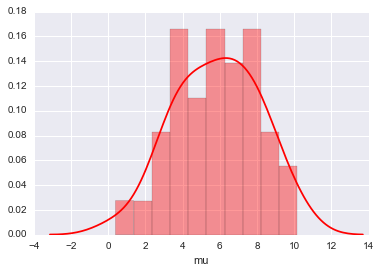

In [84]:
### Gompertz - Mu (Trimmed), Sub-Saharan Africa
sns.distplot(ssa_gomp.mu[ssa_gomp.mu>0],bins=10,color='r')

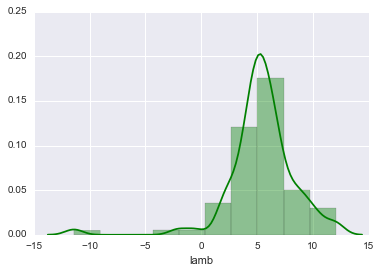

In [22]:
### Gompertz - Lambda
lplot1=sns.distplot(dframe_gomp.lamb,bins=10,color='royalblue',label=)

In [21]:
### Gompertz - Lambda, Sub-Saharan Africa
lplot1=sns.distplot(ssa_gomp.lamb,bins=10,label='Gompertz',color='royalblue')
lplot2=sns.distplot(ssa_log.lamb,bins=10,label='Logistic',color='red')
plt.xlabel(r'Lag time ($\lambda$)')
plt.ylabel('KDE')
lgd = plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.show()

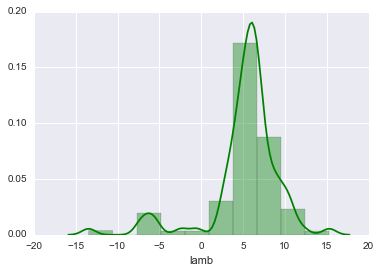

In [58]:
### Logisitic - Lambda
sns.distplot(dframe_log.lamb,bins=10,color='g')

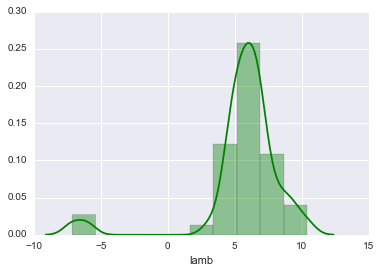

In [86]:
### Logistic - Lambda, Sub-Saharan Africa
sns.distplot(ssa_log.lamb,bins=10,color='g')

In [23]:
sns.jointplot(x='A',y='mu',data=ssa_gomp)
plt.show()

In [25]:
sns.jointplot(x='mu',y='ART Coverage (2014)',data=ssa_gomp)
plt.show()

In [26]:
sns.jointplot(x='A',y='ART Coverage (2014)',data=ssa_gomp)
plt.show()